In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
import numpy as np
warnings.filterwarnings('ignore')

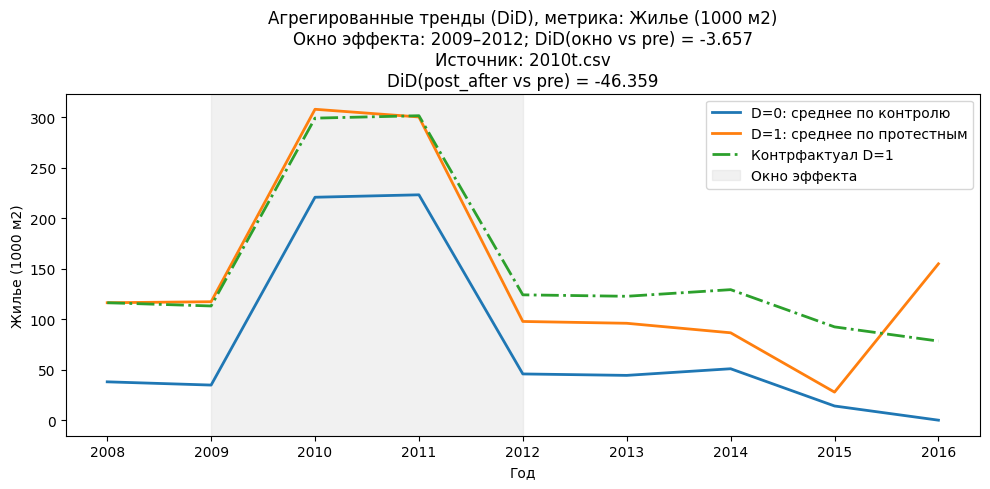

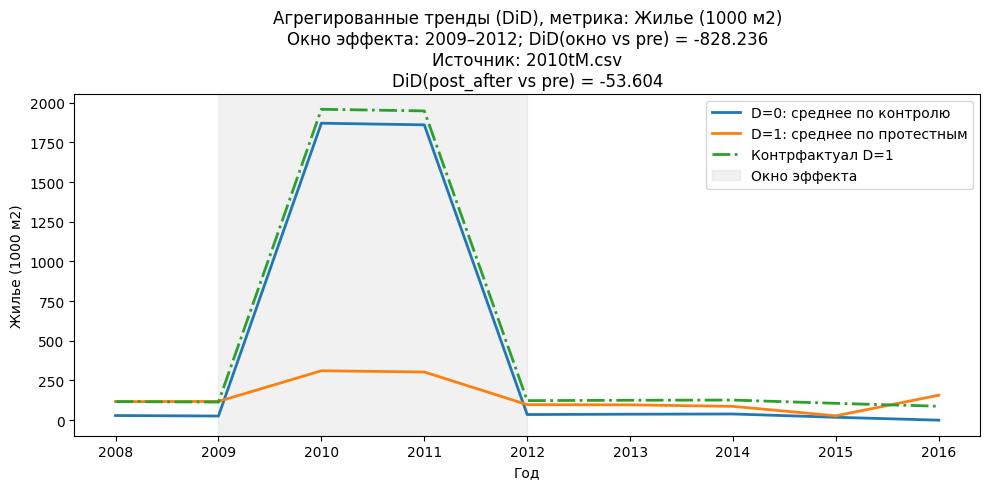

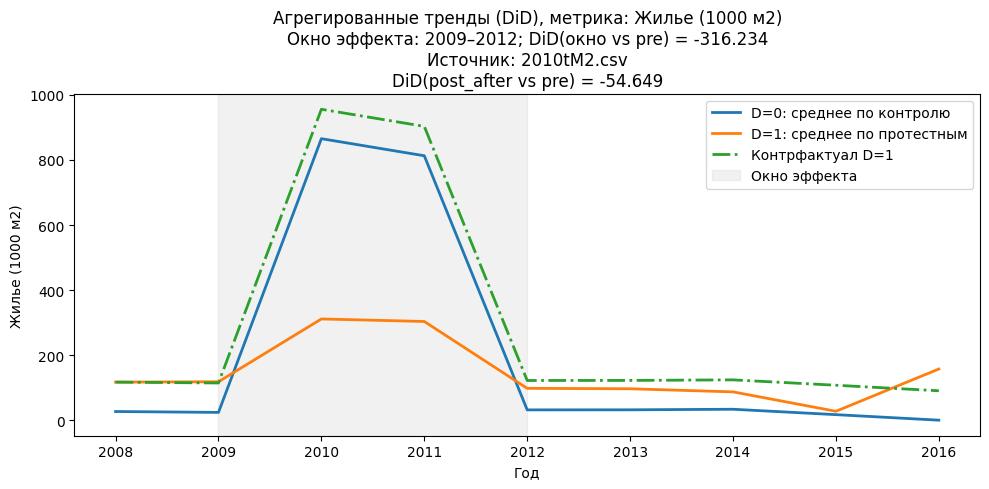

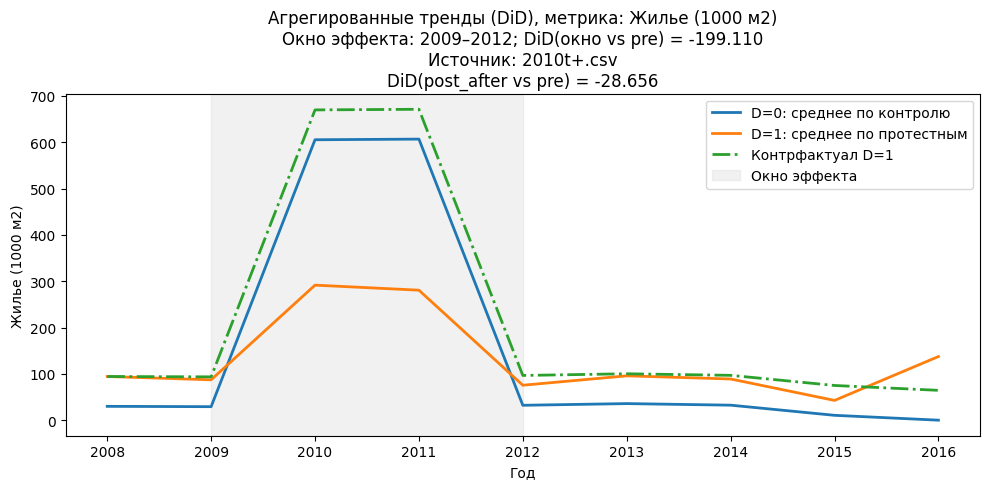

In [11]:
CSV_PATHS = ['2010t.csv', '2010tM.csv', '2010tM2.csv', '2010t+.csv']
OUTCOME = 'Жилье (1000 м2)'
# 'Жилье (1000 м2)'
# 'Дороги (%)'
START_YEAR = 2009
END_YEAR = 2012
OUTPUT_DIR = Path('did_output')

for CSV_PATH in CSV_PATHS:
    df = pd.read_csv(CSV_PATH)
    df['year'] = df['year'].astype(float).round().astype(int)

    agg = (
        df.groupby('year', dropna=False)
          .agg(
              mean_treated=(f'{OUTCOME}_protest', 'mean'),
              mean_control=(f'{OUTCOME}_event', 'mean'),
          )
          .reset_index()
          .sort_values('year')
          .reset_index(drop=True)
    )

    pre_mask = agg['year'] < START_YEAR
    window_mask = (agg['year'] >= START_YEAR) & (agg['year'] <= END_YEAR)
    post_mask = agg['year'] > END_YEAR

    treated_pre = agg.loc[pre_mask, 'mean_treated'].mean()
    control_pre = agg.loc[pre_mask, 'mean_control'].mean()
    treated_win = agg.loc[window_mask, 'mean_treated'].mean()
    control_win = agg.loc[window_mask, 'mean_control'].mean()

    did_window = (treated_win - treated_pre) - (control_win - control_pre)

    if post_mask.any():
        treated_post = agg.loc[post_mask, 'mean_treated'].mean()
        control_post = agg.loc[post_mask, 'mean_control'].mean()
        did_post_after = (treated_post - treated_pre) - (control_post - control_pre)
    else:
        treated_post = control_post = did_post_after = None

    treated_cf = treated_pre + (agg['mean_control'] - control_pre)

    mask_until_2016 = agg['year'] <= 2016
    agg = agg.loc[mask_until_2016].reset_index(drop=True)
    treated_cf = treated_cf.loc[mask_until_2016].reset_index(drop=True)

    plt.figure(figsize=(10, 5))
    plt.plot(agg['year'], agg['mean_control'], label='D=0: среднее по контролю', lw=2)
    plt.plot(agg['year'], agg['mean_treated'], label='D=1: среднее по протестным', lw=2)
    plt.plot(agg['year'], treated_cf, label='Контрфактуал D=1', lw=2, ls='-.')

    plt.axvspan(START_YEAR, END_YEAR, color='lightgrey', alpha=0.3, label='Окно эффекта')

    title_lines = [
        f'Агрегированные тренды (DiD), метрика: {OUTCOME}',
        f'Окно эффекта: {START_YEAR}–{END_YEAR}; DiD(окно vs pre) = {did_window:.3f}',
        f'Источник: {CSV_PATH}'
    ]
    if did_post_after is not None:
        title_lines.append(f'DiD(post_after vs pre) = {did_post_after:.3f}')
    plt.title('\n'.join(title_lines))

    plt.xlabel('Год')
    plt.ylabel(OUTCOME)
    plt.legend()
    plt.tight_layout()
    plt.show()



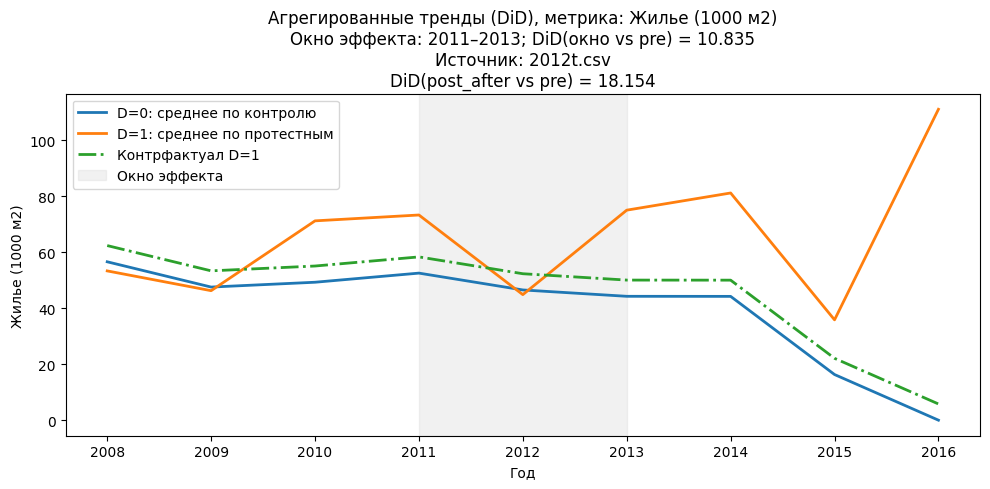

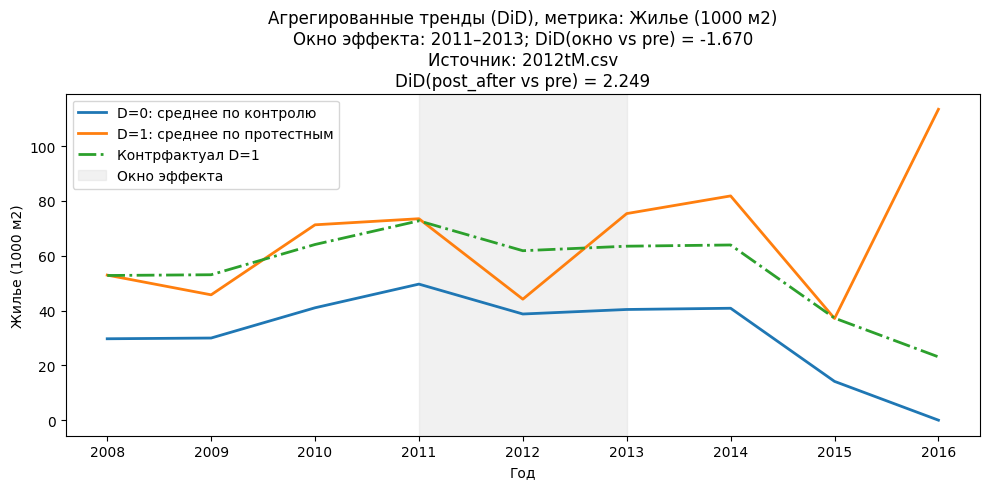

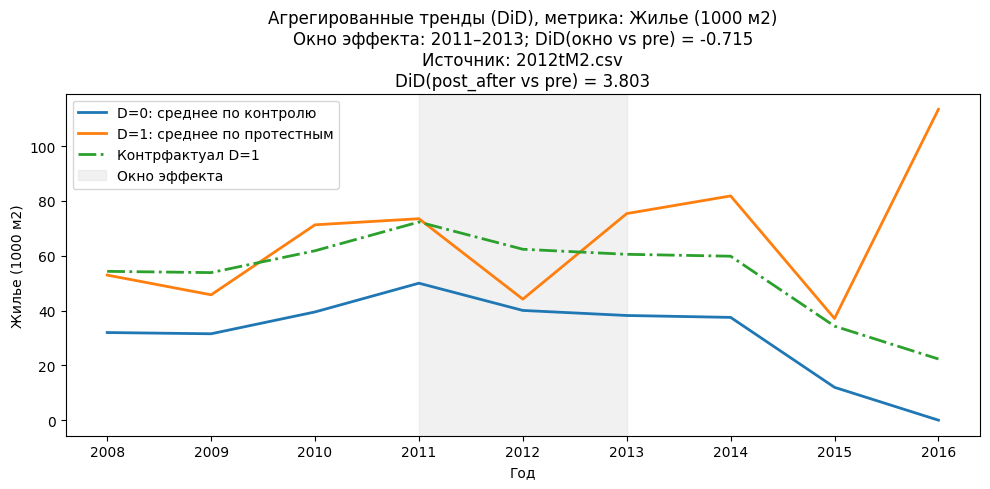

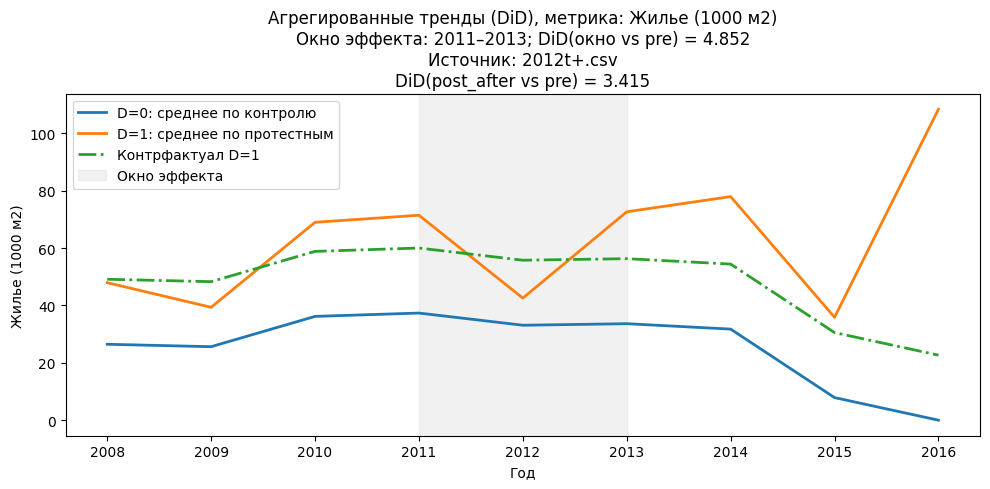

In [12]:
CSV_PATHS = ['2012t.csv', '2012tM.csv', '2012tM2.csv', '2012t+.csv']
OUTCOME = 'Жилье (1000 м2)'
# 'Жилье (1000 м2)'
# 'Дороги (%)'
START_YEAR = 2011
END_YEAR = 2013
OUTPUT_DIR = Path('did_output')

for CSV_PATH in CSV_PATHS:
    df = pd.read_csv(CSV_PATH)
    df['year'] = df['year'].astype(float).round().astype(int)

    agg = (
        df.groupby('year', dropna=False)
          .agg(
              mean_treated=(f'{OUTCOME}_protest', 'mean'),
              mean_control=(f'{OUTCOME}_event', 'mean'),
          )
          .reset_index()
          .sort_values('year')
          .reset_index(drop=True)
    )

    pre_mask = agg['year'] < START_YEAR
    window_mask = (agg['year'] >= START_YEAR) & (agg['year'] <= END_YEAR)
    post_mask = agg['year'] > END_YEAR

    treated_pre = agg.loc[pre_mask, 'mean_treated'].mean()
    control_pre = agg.loc[pre_mask, 'mean_control'].mean()
    treated_win = agg.loc[window_mask, 'mean_treated'].mean()
    control_win = agg.loc[window_mask, 'mean_control'].mean()

    did_window = (treated_win - treated_pre) - (control_win - control_pre)

    if post_mask.any():
        treated_post = agg.loc[post_mask, 'mean_treated'].mean()
        control_post = agg.loc[post_mask, 'mean_control'].mean()
        did_post_after = (treated_post - treated_pre) - (control_post - control_pre)
    else:
        treated_post = control_post = did_post_after = None

    treated_cf = treated_pre + (agg['mean_control'] - control_pre)

    mask_until_2016 = agg['year'] <= 2016
    agg = agg.loc[mask_until_2016].reset_index(drop=True)
    treated_cf = treated_cf.loc[mask_until_2016].reset_index(drop=True)

    plt.figure(figsize=(10, 5))
    plt.plot(agg['year'], agg['mean_control'], label='D=0: среднее по контролю', lw=2)
    plt.plot(agg['year'], agg['mean_treated'], label='D=1: среднее по протестным', lw=2)
    plt.plot(agg['year'], treated_cf, label='Контрфактуал D=1', lw=2, ls='-.')

    plt.axvspan(START_YEAR, END_YEAR, color='lightgrey', alpha=0.3, label='Окно эффекта')

    title_lines = [
        f'Агрегированные тренды (DiD), метрика: {OUTCOME}',
        f'Окно эффекта: {START_YEAR}–{END_YEAR}; DiD(окно vs pre) = {did_window:.3f}',
        f'Источник: {CSV_PATH}'
    ]
    if did_post_after is not None:
        title_lines.append(f'DiD(post_after vs pre) = {did_post_after:.3f}')
    plt.title('\n'.join(title_lines))

    plt.xlabel('Год')
    plt.ylabel(OUTCOME)
    plt.legend()
    plt.tight_layout()
    plt.show()



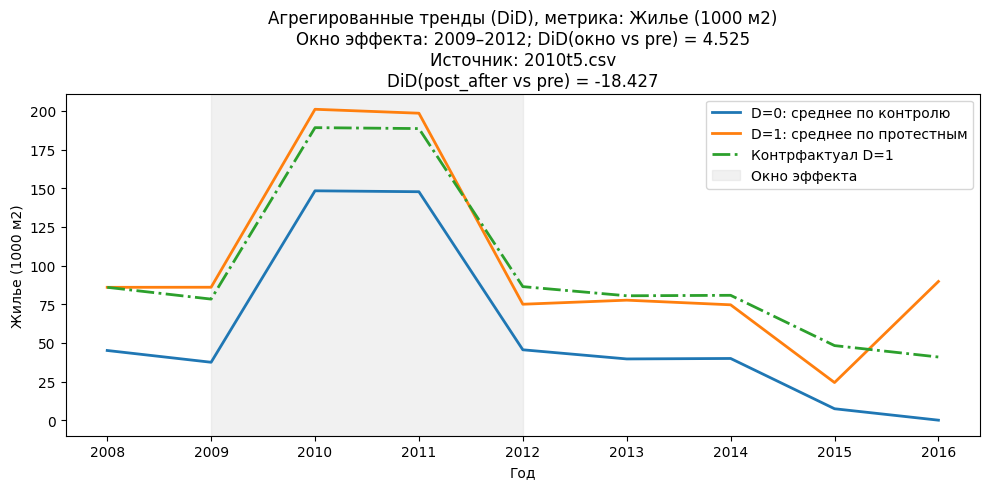

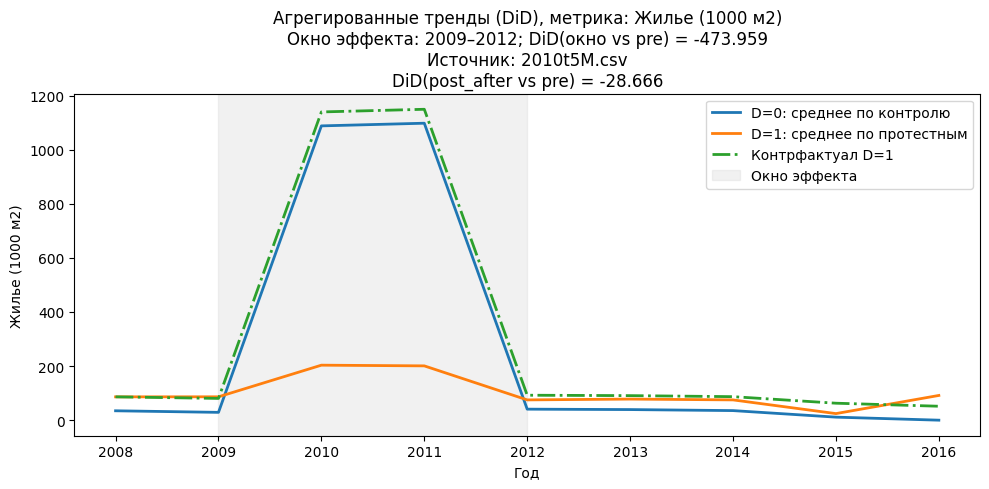

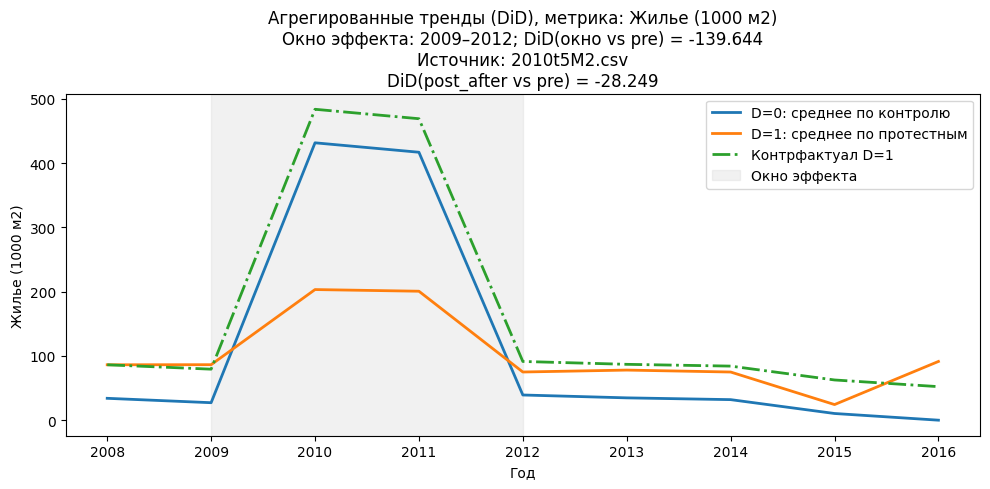

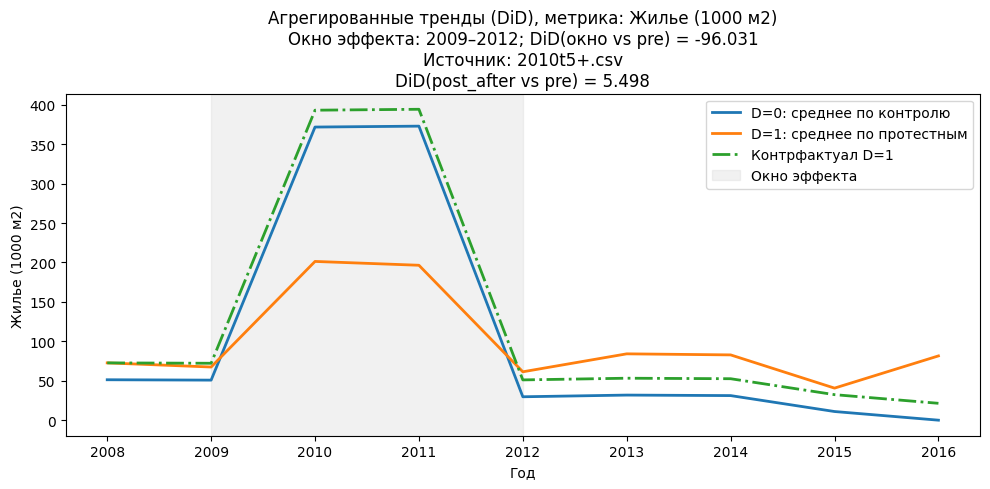

In [13]:
CSV_PATHS = ['2010t5.csv', '2010t5M.csv', '2010t5M2.csv', '2010t5+.csv']
OUTCOME = 'Жилье (1000 м2)'

START_YEAR = 2009
END_YEAR = 2012
OUTPUT_DIR = Path('did_output')

for CSV_PATH in CSV_PATHS:
    df = pd.read_csv(CSV_PATH)
    df['year'] = df['year'].astype(float).round().astype(int)

    agg = (
        df.groupby('year', dropna=False)
          .agg(
              mean_treated=(f'{OUTCOME}_protest', 'mean'),
              mean_control=(f'{OUTCOME}_event', 'mean'),
          )
          .reset_index()
          .sort_values('year')
          .reset_index(drop=True)
    )

    pre_mask = agg['year'] < START_YEAR
    window_mask = (agg['year'] >= START_YEAR) & (agg['year'] <= END_YEAR)
    post_mask = agg['year'] > END_YEAR

    treated_pre = agg.loc[pre_mask, 'mean_treated'].mean()
    control_pre = agg.loc[pre_mask, 'mean_control'].mean()
    treated_win = agg.loc[window_mask, 'mean_treated'].mean()
    control_win = agg.loc[window_mask, 'mean_control'].mean()

    did_window = (treated_win - treated_pre) - (control_win - control_pre)

    if post_mask.any():
        treated_post = agg.loc[post_mask, 'mean_treated'].mean()
        control_post = agg.loc[post_mask, 'mean_control'].mean()
        did_post_after = (treated_post - treated_pre) - (control_post - control_pre)
    else:
        treated_post = control_post = did_post_after = None

    treated_cf = treated_pre + (agg['mean_control'] - control_pre)

    mask_until_2016 = agg['year'] <= 2016
    agg = agg.loc[mask_until_2016].reset_index(drop=True)
    treated_cf = treated_cf.loc[mask_until_2016].reset_index(drop=True)

    plt.figure(figsize=(10, 5))
    plt.plot(agg['year'], agg['mean_control'], label='D=0: среднее по контролю', lw=2)
    plt.plot(agg['year'], agg['mean_treated'], label='D=1: среднее по протестным', lw=2)
    plt.plot(agg['year'], treated_cf, label='Контрфактуал D=1', lw=2, ls='-.')

    plt.axvspan(START_YEAR, END_YEAR, color='lightgrey', alpha=0.3, label='Окно эффекта')

    title_lines = [
        f'Агрегированные тренды (DiD), метрика: {OUTCOME}',
        f'Окно эффекта: {START_YEAR}–{END_YEAR}; DiD(окно vs pre) = {did_window:.3f}',
        f'Источник: {CSV_PATH}'
    ]
    if did_post_after is not None:
        title_lines.append(f'DiD(post_after vs pre) = {did_post_after:.3f}')
    plt.title('\n'.join(title_lines))

    plt.xlabel('Год')
    plt.ylabel(OUTCOME)
    plt.legend()
    plt.tight_layout()
    plt.show()



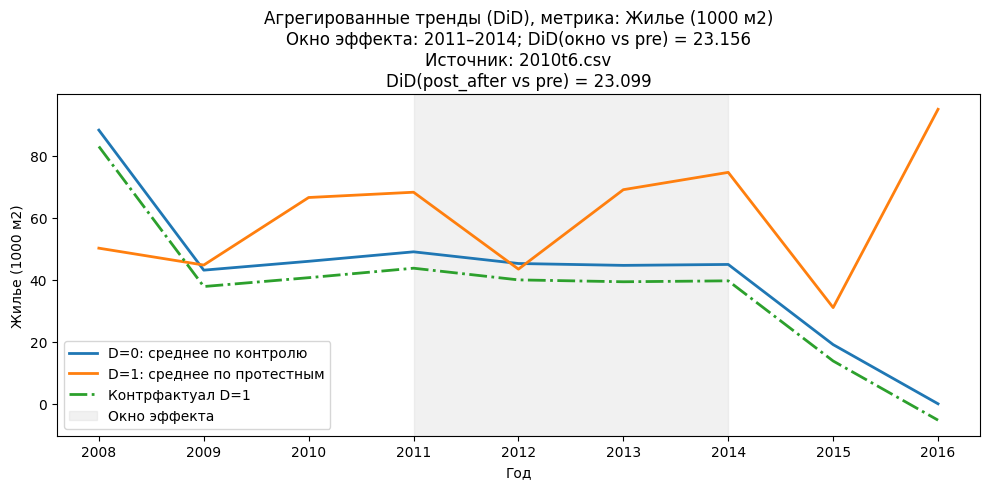

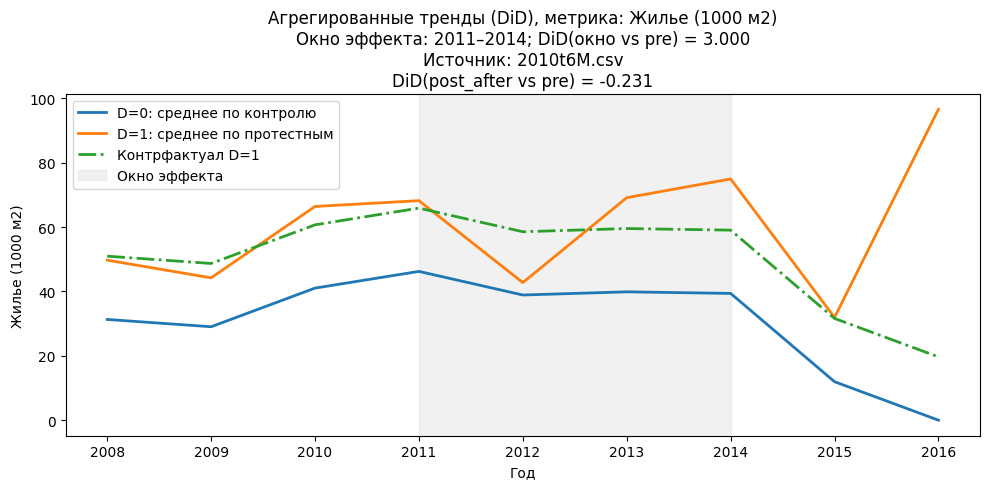

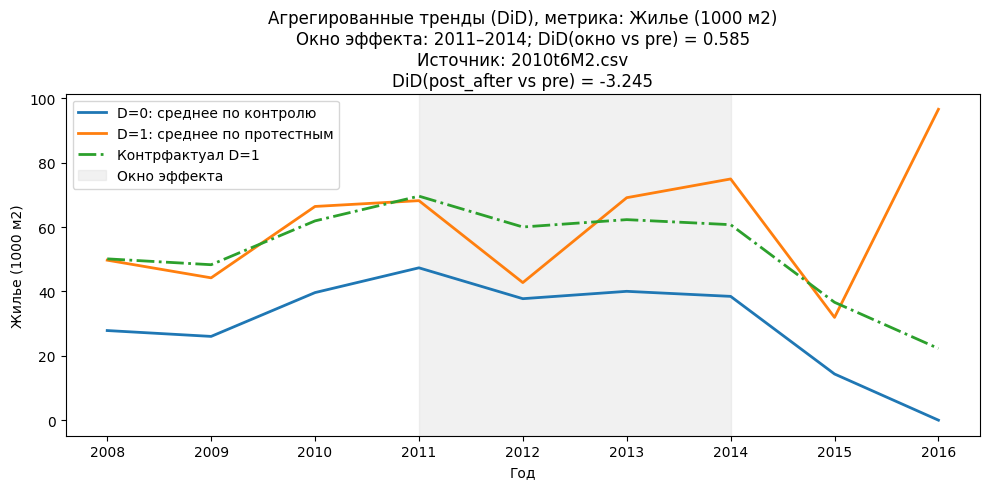

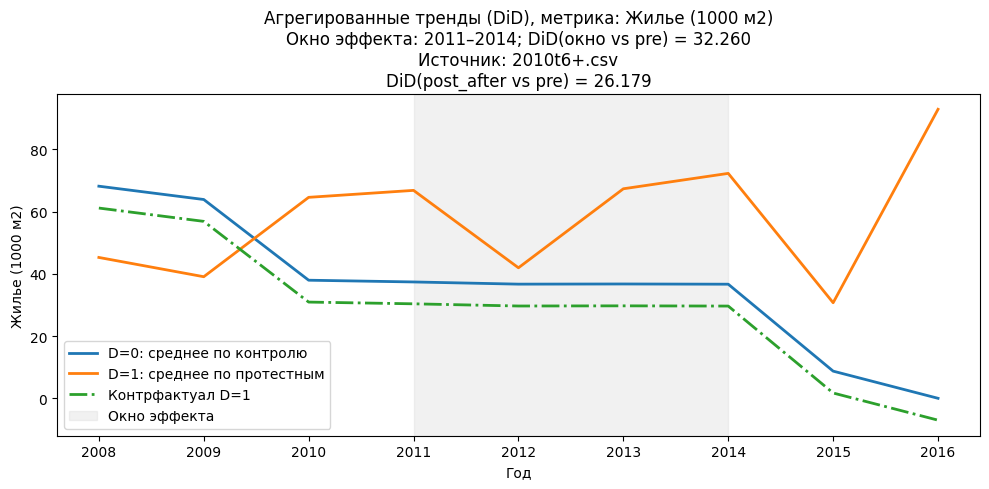

In [14]:
CSV_PATHS = ['2010t6.csv', '2010t6M.csv', '2010t6M2.csv', '2010t6+.csv']
OUTCOME = 'Жилье (1000 м2)'

START_YEAR = 2011
END_YEAR = 2014
OUTPUT_DIR = Path('did_output')

for CSV_PATH in CSV_PATHS:
    df = pd.read_csv(CSV_PATH)
    df['year'] = df['year'].astype(float).round().astype(int)

    agg = (
        df.groupby('year', dropna=False)
          .agg(
              mean_treated=(f'{OUTCOME}_protest', 'mean'),
              mean_control=(f'{OUTCOME}_event', 'mean'),
          )
          .reset_index()
          .sort_values('year')
          .reset_index(drop=True)
    )

    pre_mask = agg['year'] < START_YEAR
    window_mask = (agg['year'] >= START_YEAR) & (agg['year'] <= END_YEAR)
    post_mask = agg['year'] > END_YEAR

    treated_pre = agg.loc[pre_mask, 'mean_treated'].mean()
    control_pre = agg.loc[pre_mask, 'mean_control'].mean()
    treated_win = agg.loc[window_mask, 'mean_treated'].mean()
    control_win = agg.loc[window_mask, 'mean_control'].mean()

    did_window = (treated_win - treated_pre) - (control_win - control_pre)

    if post_mask.any():
        treated_post = agg.loc[post_mask, 'mean_treated'].mean()
        control_post = agg.loc[post_mask, 'mean_control'].mean()
        did_post_after = (treated_post - treated_pre) - (control_post - control_pre)
    else:
        treated_post = control_post = did_post_after = None

    treated_cf = treated_pre + (agg['mean_control'] - control_pre)

    mask_until_2016 = agg['year'] <= 2016
    agg = agg.loc[mask_until_2016].reset_index(drop=True)
    treated_cf = treated_cf.loc[mask_until_2016].reset_index(drop=True)

    plt.figure(figsize=(10, 5))
    plt.plot(agg['year'], agg['mean_control'], label='D=0: среднее по контролю', lw=2)
    plt.plot(agg['year'], agg['mean_treated'], label='D=1: среднее по протестным', lw=2)
    plt.plot(agg['year'], treated_cf, label='Контрфактуал D=1', lw=2, ls='-.')

    plt.axvspan(START_YEAR, END_YEAR, color='lightgrey', alpha=0.3, label='Окно эффекта')

    title_lines = [
        f'Агрегированные тренды (DiD), метрика: {OUTCOME}',
        f'Окно эффекта: {START_YEAR}–{END_YEAR}; DiD(окно vs pre) = {did_window:.3f}',
        f'Источник: {CSV_PATH}'
    ]
    if did_post_after is not None:
        title_lines.append(f'DiD(post_after vs pre) = {did_post_after:.3f}')
    plt.title('\n'.join(title_lines))

    plt.xlabel('Год')
    plt.ylabel(OUTCOME)
    plt.legend()
    plt.tight_layout()
    plt.show()

